# EDA on nutrition value of McDonald's India menu

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Import Dataset

In [2]:
df = pd.read_csv('India_Menu.csv')

## Explore Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Menu Category           141 non-null    object 
 1   Menu Items              141 non-null    object 
 2   Per Serve Size          141 non-null    object 
 3   Energy (kCal)           141 non-null    float64
 4   Protein (g)             141 non-null    float64
 5   Total fat (g)           141 non-null    float64
 6   Sat Fat (g)             141 non-null    float64
 7   Trans fat (g)           141 non-null    float64
 8   Cholesterols (mg)       141 non-null    float64
 9   Total carbohydrate (g)  141 non-null    float64
 10  Total Sugars (g)        141 non-null    float64
 11  Added Sugars (g)        141 non-null    float64
 12  Sodium (mg)             140 non-null    float64
dtypes: float64(10), object(3)
memory usage: 14.4+ KB


In [4]:
df.head()

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
0,Regular Menu,McVeggie™ Burger,168 g,402.05,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13
1,Regular Menu,McAloo Tikki Burger®,146 g,339.52,8.50,11.31,4.27,0.20,1.47,50.27,7.05,4.07,545.34
2,Regular Menu,McSpicy™ Paneer Burger,199 g,652.76,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58
3,Regular Menu,Spicy Paneer Wrap,250 g,674.68,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46
4,Regular Menu,American Veg Burger,177 g,512.17,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24


In [5]:
df.describe()

,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,140.000000
mean,244.635461,7.493546,9.991702,4.997589,0.687163,26.350071,31.190284,15.464894,10.336950,362.064143
std,185.554837,8.336863,10.339511,4.900451,6.326136,50.334200,20.602044,15.690202,14.283388,473.160490
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,116.360000,0.650000,0.460000,0.280000,0.060000,1.510000,15.740000,2.330000,0.000000,43.895000
50%,219.360000,4.790000,7.770000,4.270000,0.150000,8.390000,30.820000,9.160000,3.640000,152.025000
75%,339.520000,10.880000,14.160000,7.280000,0.220000,31.110000,46.000000,26.950000,19.230000,534.240000
max,834.360000,39.470000,45.180000,20.460000,75.260000,302.610000,93.840000,64.220000,64.220000,2399.490000


## Data Cleaning: Find missing values and replace them if any

In [6]:
df.isna().any()

Menu Category             False
Menu Items                False
Per Serve Size            False
Energy (kCal)             False
Protein (g)               False
Total fat (g)             False
Sat Fat (g)               False
Trans fat (g)             False
Cholesterols (mg)         False
Total carbohydrate (g)    False
Total Sugars (g)          False
Added Sugars (g)          False
Sodium (mg)                True
dtype: bool

##### We have missing data in Sodium attribute.
Dropping it may not be a good option, we can replace it with some value.    
Sodium ranges from 0 to 2400 mg, which is varying too much, so replace it with mean value.

In [7]:
median_value = df['Sodium (mg)'].median()
df.fillna(value = median_value, inplace = True)

In [8]:
df.isna().any()

Menu Category             False
Menu Items                False
Per Serve Size            False
Energy (kCal)             False
Protein (g)               False
Total fat (g)             False
Sat Fat (g)               False
Trans fat (g)             False
Cholesterols (mg)         False
Total carbohydrate (g)    False
Total Sugars (g)          False
Added Sugars (g)          False
Sodium (mg)               False
dtype: bool

## Exploratory Data Analysis

* Category wise mean data
* Correlation between nutrients
* Top 5 Energy Density food
* Healthy and Unhealthy food
* Healthy and Unhealthy drinks

### Category wise mean data

In [9]:
features = ['Per Serve Size', 'Energy (kCal)', 'Protein (g)', 'Total fat (g)',
 'Sat Fat (g)', 'Trans fat (g)', 'Cholesterols (mg)', 'Total carbohydrate (g)', 'Total Sugars (g)',
 'Added Sugars (g)', 'Sodium (mg)']
df.groupby('Menu Category')[features].mean().style.background_gradient()

,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
Menu Category,,,,,,,,,,
Beverages Menu,143.326471,0.268235,0.308824,0.225882,0.008824,0.829412,34.851765,34.677059,34.025882,37.604118
Breakfast Menu,181.290000,7.636667,7.735333,4.354000,0.146000,61.010667,21.074000,4.358667,1.220000,360.378000
Condiments Menu,47.473333,0.731111,3.876667,0.572222,0.067778,1.834444,8.287778,6.104444,1.691111,121.148889
Desserts Menu,162.875000,2.815000,5.255000,3.160000,0.095000,6.400000,26.055000,19.920000,15.015000,115.815000
Gourmet Menu,543.497273,21.684545,27.671818,11.987273,0.194545,73.210909,49.179091,8.799091,4.811818,1166.438636
McCafe Menu,183.679608,4.295490,5.945686,4.558824,0.219804,12.861373,29.039412,22.615490,13.680980,103.371961
Regular Menu,367.737778,12.990833,17.625833,7.213333,2.233333,35.987222,37.237778,5.019444,1.801667,704.758333


<AxesSubplot:xlabel='Menu Category', ylabel='Energy (kCal)'>

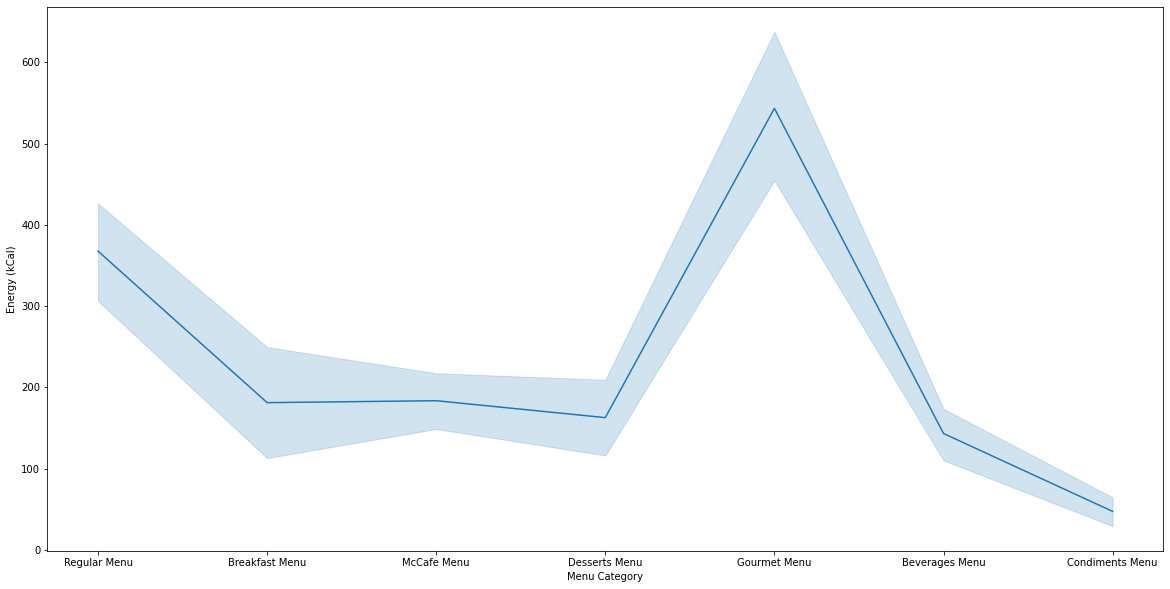

In [10]:
plt.figure(figsize=(20,10))

plt.subplot(1,1,1)
sns.lineplot(data=df, y="Energy (kCal)", x="Menu Category")

### Correlatin between nutrients

<AxesSubplot:>

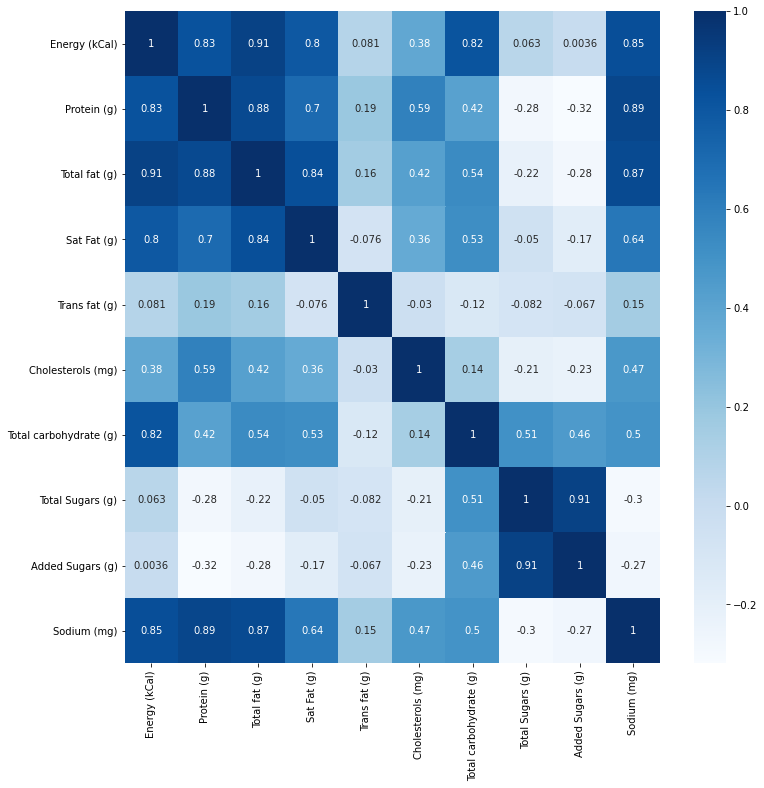

In [11]:
plt.figure(figsize=(12,12))
sns.heatmap(data = df.corr(), annot=True, cmap="Blues")

##### <font color = blue>Here are some combinations that have a strong correlation.</font>

*Energy and Total fat   
*Protein and Sodium   
*Added Sugars and Total Sugars  

##### Separate food and drinks

In [12]:
drinks = df['Per Serve Size'].str.contains('ml')
df.loc[drinks,'Food Category'] = 'Drink'
food = df['Per Serve Size'].str.contains('g')
df.loc[food,'Food Category'] = 'Food'

In [13]:
df['Per Serve Size'] = df['Per Serve Size'].str.replace(' g', '')
df['Per Serve Size'] = df['Per Serve Size'].str.replace(' ml', '').astype('float64')

In [14]:
df

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg),Food Category
0,Regular Menu,McVeggie™ Burger,168.0,402.05,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13,Food
1,Regular Menu,McAloo Tikki Burger®,146.0,339.52,8.50,11.31,4.27,0.20,1.47,50.27,7.05,4.07,545.34,Food
2,Regular Menu,McSpicy™ Paneer Burger,199.0,652.76,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58,Food
3,Regular Menu,Spicy Paneer Wrap,250.0,674.68,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46,Food
4,Regular Menu,American Veg Burger,177.0,512.17,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24,Food
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,Condiments Menu,Tomato Ketchup Sachets,8.0,11.23,0.08,23.45,0.00,0.01,0.08,2.63,2.33,1.64,71.05,Food
137,Condiments Menu,Maple Syrup,30.0,86.40,0.00,0.00,0.00,0.00,0.30,21.60,16.20,5.34,15.00,Food
138,Condiments Menu,Cheese Slice,14.0,51.03,3.06,3.99,2.89,0.01,13.43,0.72,0.54,0.00,178.95,Food
139,Condiments Menu,Sweet Corn,40.0,45.08,1.47,1.00,0.22,0.04,2.00,7.55,2.54,0.00,0.04,Food


### Energy density

#### Top 5 food by Energy (kCal)

<AxesSubplot:xlabel='Energy (kCal)', ylabel='Menu Items'>

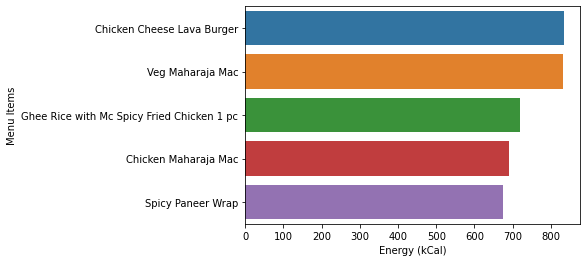

In [15]:
food_menu = df[df['Food Category'] == 'Food']
food_df = food_menu[['Menu Items', 'Energy (kCal)']].sort_values('Energy (kCal)',ascending=False).head(5)
sns.barplot(y='Menu Items', x='Energy (kCal)', data = food_df)

###### The energy density of a food is the number of calories divided by the weight

In [16]:
food_menu['Energy Density (kCal/g)'] = food_menu['Energy (kCal)']/food_menu['Per Serve Size']
food_menu.head()

<ipython-input-16-f8b664911c6a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_menu['Energy Density (kCal/g)'] = food_menu['Energy (kCal)']/food_menu['Per Serve Size']


,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg),Food Category,Energy Density (kCal/g)
0,Regular Menu,McVeggie™ Burger,168.0,402.05,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13,Food,2.393155
1,Regular Menu,McAloo Tikki Burger®,146.0,339.52,8.50,11.31,4.27,0.20,1.47,50.27,7.05,4.07,545.34,Food,2.325479
2,Regular Menu,McSpicy™ Paneer Burger,199.0,652.76,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58,Food,3.280201
3,Regular Menu,Spicy Paneer Wrap,250.0,674.68,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46,Food,2.698720
4,Regular Menu,American Veg Burger,177.0,512.17,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24,Food,2.893616


#### Top 5 food by Energy density

In [17]:
food_menu[['Menu Items', 'Energy Density (kCal/g)']].sort_values('Energy Density (kCal/g)',ascending = False).head(5)

,Menu Items,Energy Density (kCal/g)
34,Double Chocochips Muffin,4.271000
35,Vanilla Chocochips Muffin,4.116125
138,Cheese Slice,3.645000
135,Piri Piri Mix,3.426000
2,McSpicy™ Paneer Burger,3.280201


<AxesSubplot:xlabel='Energy Density (kCal/g)', ylabel='Menu Items'>

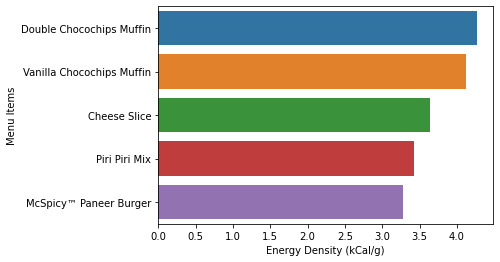

In [18]:
energy_density_df = food_menu[['Menu Items', 'Energy Density (kCal/g)']].sort_values('Energy Density (kCal/g)',ascending = False).head(5)
sns.barplot(y='Menu Items', x='Energy Density (kCal/g)', data = energy_density_df)

### Best and Worst healthy food

For food being healthy nutrients should contain :-

> More Energy  
More Protein  
More Carbohydrates  
Less Total fat  
Less Cholesterol  
Less Total Sugars  
Less Added Sugars  
Less Sodium  

1 gm Protein = 4 cal  
1 gm Carb = 4 cal  
1 gm Fat = 9 cal  
1 gm Sugar = 4 cal

#### <font color = green>Healthy food</font>
###### Healthy food contain healthy macro nutrients like Proteins and Carbohydrates, we are calculating ratio of both proteins and carbs to total calories so as to normalise each menu item

In [19]:
food_menu['Protein + Carbs (g)'] = (food_menu['Protein (g)']*4) + (food_menu['Total carbohydrate (g)']*4)
food_menu['Protein + Carbs Density'] = food_menu['Protein + Carbs (g)']/food_menu['Energy (kCal)']
food_menu[['Menu Items', 'Menu Category', 'Protein + Carbs Density']].sort_values('Protein + Carbs Density', ascending = False).head(10)

<ipython-input-19-a82d4f9719ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_menu['Protein + Carbs (g)'] = (food_menu['Protein (g)']*4) + (food_menu['Total carbohydrate (g)']*4)
<ipython-input-19-a82d4f9719ab>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_menu['Protein + Carbs Density'] = food_menu['Protein + Carbs (g)']/food_menu['Energy (kCal)']


,Menu Items,Menu Category,Protein + Carbs Density
134,Chilli Sauce,Condiments Menu,1.001239
137,Maple Syrup,Condiments Menu,1.000000
136,Tomato Ketchup Sachets,Condiments Menu,0.965272
133,BBQ diping sauce,Condiments Menu,0.919657
97,Medium Soft Serve: Strawberry,McCafe Menu,0.866402
96,Regular Soft Serve: Strawberry,McCafe Menu,0.844440
92,Soft serve cone,McCafe Menu,0.803453
139,Sweet Corn,Condiments Menu,0.800355
101,Medium Blackforest,McCafe Menu,0.785766
100,Regular Blackforest,McCafe Menu,0.784228


#### <font color = red>Unhealthy food</font>
###### Unhealthy food contain fats in high amount, we are calculating density of fats to normalise each menu item

In [20]:
food_menu['Fats Density'] = (food_menu['Total fat (g)']*9)/food_menu['Energy (kCal)']
food_menu[['Menu Items', 'Menu Category', 'Fats Density']].sort_values('Fats Density', ascending = False).head(10)

<ipython-input-20-563a9a804e13>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_menu['Fats Density'] = (food_menu['Total fat (g)']*9)/food_menu['Energy (kCal)']


,Menu Items,Menu Category,Fats Density
136,Tomato Ketchup Sachets,Condiments Menu,18.793411
138,Cheese Slice,Condiments Menu,0.703704
24,3 piece Chicken Strips,Regular Menu,0.677600
23,2 piece Chicken Strips,Regular Menu,0.677572
25,5 piece Chicken Strips,Regular Menu,0.624827
132,Mustard diping sauce,Condiments Menu,0.617517
110,McSpicy Premium Veg Burger,Gourmet Menu,0.555986
2,McSpicy™ Paneer Burger,Regular Menu,0.543921
3,Spicy Paneer Wrap,Regular Menu,0.521581
19,McSpicy Fried Chicken 1 pc,Regular Menu,0.517004


<font color= red>Note: Some values of ratio are exceeding ex. Fats ratio of Tomato Ketchup Sachets is 18 that means the data may be wrong there</font>

### Best and Worst healthy drinks

##### Drinks contains almost negligible proteins, carbohydrates and fats analysing those wouldn't be helpful, Drinks contains heavy amount of sugars, we can get insights by analysing sugar content in drinks

#### <font color = green>Healthy drinks</font>

In [21]:
drinks_menu = df[df['Food Category'] == 'Drink']

In [22]:
drinks_menu[['Menu Items', 'Menu Category', 'Total Sugars (g)']].sort_values('Total Sugars (g)',ascending = True).head(10)

,Menu Items,Menu Category,Total Sugars (g)
32,L1 Coffee,Regular Menu,0.00
130,Coke Zero Can,Beverages Menu,0.00
131,Vedica Natural Mineral Water,Beverages Menu,0.00
44,Espresso,Breakfast Menu,0.13
46,Americano (S),Breakfast Menu,0.13
47,Americano (R),Breakfast Menu,0.24
48,Americano (L),Breakfast Menu,0.28
73,Strawberry Green Tea (S),McCafe Menu,1.40
70,Moroccon Mint Green Tea (S),McCafe Menu,1.40
67,English Breakfast (S),McCafe Menu,1.40


#### <font color = red>Unhealthy drinks</font>

In [23]:
drinks_menu[['Menu Items', 'Menu Category', 'Total Sugars (g)']].sort_values('Total Sugars (g)',ascending = False).head(10)

,Menu Items,Menu Category,Total Sugars (g)
120,Large Fanta Oragne,Beverages Menu,64.22
126,Large Sprite,Beverages Menu,59.28
82,Chocolate Oreo Frappe,McCafe Menu,55.14
117,Large Coca-Cola,Beverages Menu,54.34
91,American Mud Pie Shake,McCafe Menu,53.40
123,Large Thums-up,Beverages Menu,49.40
64,Hot Chocolate (L),McCafe Menu,47.96
81,Mocha Frappe,McCafe Menu,47.55
119,Medium Fanta Orange,Beverages Menu,44.72
86,Mixed Berry Smoothie,McCafe Menu,43.00
